<a href="https://colab.research.google.com/github/Arman-1994/Experimental-Place/blob/master/MNIST_(Hand_Written_Digits)_ANN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade tensorflow-gpu 

Requirement already up-to-date: tensorflow-gpu in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

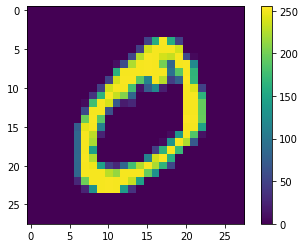

In [5]:
img_no = 1
plt.imshow(x_train[img_no])
plt.colorbar()

In [0]:
x_train = x_train / 255
x_test  = x_test / 255

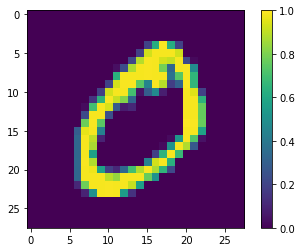

In [7]:
img_no = 1
plt.imshow(x_train[img_no])
plt.colorbar()

In [0]:
x_train = x_train.reshape((-1,784))
x_test = x_test.reshape((-1,784))

In [9]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
model = Sequential()
model.add(Dense(512,'relu',kernel_initializer='he_normal',input_shape=(784,)))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(256,'relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(128,'relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(64,'relu'))
model.add(Dense(10,'softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [14]:
hist = model.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=30,epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 147us/sample - loss: 0.5338 - accuracy: 0.8331 - val_loss: 0.1580 - val_accuracy: 0.9512
Epoch 2/50
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2875 - accuracy: 0.9149 - val_loss: 0.1183 - val_accuracy: 0.9630
Epoch 3/50
60000/60000 [==============================] - 7s 124us/sample - loss: 0.2456 - accuracy: 0.9279 - val_loss: 0.1012 - val_accuracy: 0.9677
Epoch 4/50
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2163 - accuracy: 0.9354 - val_loss: 0.1065 - val_accuracy: 0.9664
Epoch 5/50
60000/60000 [==============================] - 8s 125us/sample - loss: 0.1949 - accuracy: 0.9421 - val_loss: 0.0873 - val_accuracy: 0.9729
Epoch 6/50
60000/60000 [==============================] - 7s 125us/sample - loss: 0.1831 - accuracy: 0.9456 - val_loss: 0.0818 - val_accuracy: 0.9758
Epoch 7/50
60000/60000 [==========================

In [15]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

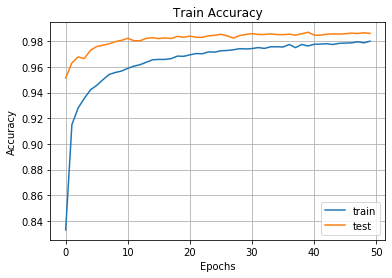

In [17]:
plt.plot(hist.history["accuracy"])
# plt.plot(history_1.history["accuracy"])
plt.plot(hist.history["val_accuracy"])

plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend(["train","test"])